**HỆ THỐNG GỢI Ý (RECOMMENDER SYSTEMS)**

In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Tạo một DataFrame giả lập cho hệ thống gợi ý (user-item interactions)
data = {
    'User': ['User1', 'User2', 'User3', 'User4', 'User5'],
    'Item1': [5, 3, 4, 4, 2],
    'Item2': [3, 4, 4, 2, 1],
    'Item3': [4, 3, 5, 4, 5],
    'Item4': [1, 2, 1, 5, 4],
}

df = pd.DataFrame(data)
df.set_index('User', inplace=True)

# Xây dựng mô hình Nearest Neighbors
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3)
model.fit(df.values)  # Sử dụng các người dùng làm đặc trưng (columns)

# Hàm gợi ý sản phẩm cho người dùng
def recommend_products(user_id, df, model):
    user_index = df.index.get_loc(user_id)  # Lấy chỉ mục người dùng trong DataFrame
    distances, indices = model.kneighbors([df.iloc[user_index].values])  # Tìm những người dùng tương tự

    # Lấy danh sách các sản phẩm người dùng đã tương tác
    user_ratings = df.iloc[user_index].values
    recommended_items = []

    # Duyệt qua những người dùng tương tự để tìm sản phẩm chưa được người dùng tương tác
    for i in range(1, len(indices[0])):
        similar_user = df.index[indices[0][i]]
        similar_user_ratings = df.iloc[indices[0][i]].values
        for j, rating in enumerate(similar_user_ratings):
            if user_ratings[j] == 0 and rating > 3:  # Nếu người dùng chưa thử và sản phẩm có điểm số cao
                recommended_items.append(df.columns[j])

    return set(recommended_items)  # Trả về danh sách các sản phẩm gợi ý

# Gợi ý sản phẩm cho User1
user = 'User1'
recommended_items = recommend_products(user, df, model)

print(f"Gợi ý sản phẩm cho {user}:")
for item in recommended_items:
    print(item)


Gợi ý sản phẩm cho User1:


**PHÁT HIỆN BẤT THƯỜNG (ANOMALY DETECTION)**

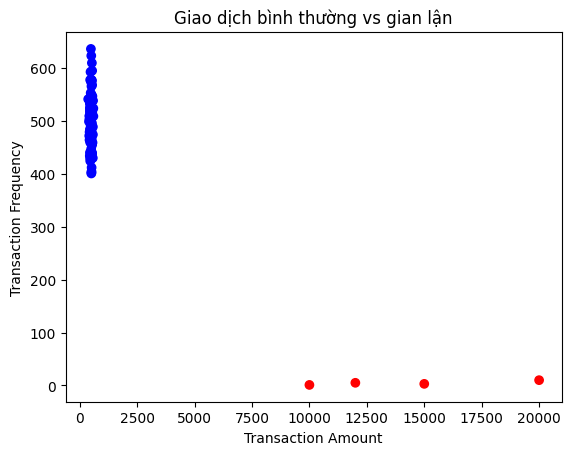

Dự đoán các giao dịch:
     Transaction Amount  Transaction Frequency       Label   Predicted
0            524.835708             493.086785      Normal      Normal
1            532.384427             576.151493      Normal      Normal
2            488.292331             488.293152      Normal      Normal
3            578.960641             538.371736      Normal      Normal
4            476.526281             527.128002      Normal      Normal
..                  ...                    ...         ...         ...
99           502.910436             442.851485      Normal      Normal
100        10000.000000               1.000000  Fraudulent  Fraudulent
101        15000.000000               3.000000  Fraudulent  Fraudulent
102        12000.000000               5.000000  Fraudulent  Fraudulent
103        20000.000000              10.000000  Fraudulent  Fraudulent

[104 rows x 4 columns]


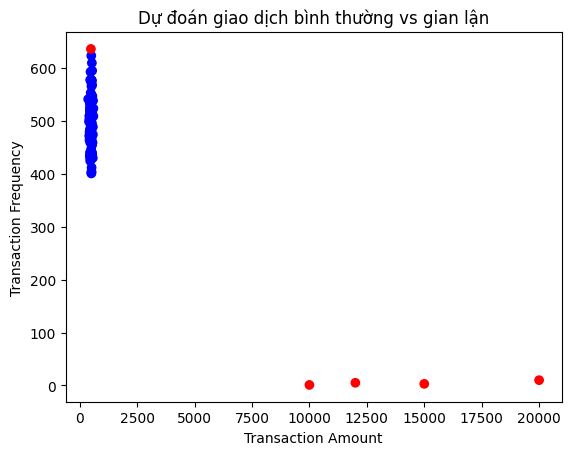

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Tạo dữ liệu giả lập về giao dịch (Số tiền giao dịch và tần suất giao dịch)
np.random.seed(42)

# Dữ liệu bình thường (giao dịch hợp lệ)
normal_transactions = np.random.normal(loc=500, scale=50, size=(100, 2))  # loc=500 (trung bình), scale=50 (độ lệch chuẩn)

# Dữ liệu bất thường (giao dịch gian lận với số tiền rất lớn)
fraudulent_transactions = np.array([[10000, 1], [15000, 3], [12000, 5], [20000, 10]])

# Kết hợp dữ liệu bình thường và bất thường
X = np.vstack([normal_transactions, fraudulent_transactions])

# Tạo DataFrame để dễ dàng theo dõi
df = pd.DataFrame(X, columns=['Transaction Amount', 'Transaction Frequency'])
df['Label'] = ['Normal'] * 100 + ['Fraudulent'] * 4  # Gắn nhãn cho dữ liệu

# Vẽ biểu đồ giao dịch
plt.scatter(df['Transaction Amount'], df['Transaction Frequency'], color=['blue' if label == 'Normal' else 'red' for label in df['Label']])
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Frequency')
plt.title('Giao dịch bình thường vs gian lận')
plt.show()

# Khởi tạo và huấn luyện mô hình Isolation Forest
model = IsolationForest(contamination=0.04)  # Dự đoán 4% dữ liệu là bất thường (giao dịch gian lận)
model.fit(X)

# Dự đoán bất thường
pred = model.predict(X)

# Chuyển kết quả dự đoán từ -1 (bất thường) và 1 (bình thường) thành nhãn dễ hiểu
df['Predicted'] = ['Fraudulent' if p == -1 else 'Normal' for p in pred]

# In kết quả dự đoán
print("Dự đoán các giao dịch:")
print(df)

# Vẽ kết quả dự đoán (giao dịch bình thường và gian lận được phân biệt)
plt.scatter(df['Transaction Amount'], df['Transaction Frequency'], c=['blue' if label == 'Normal' else 'red' for label in df['Predicted']])
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Frequency')
plt.title('Dự đoán giao dịch bình thường vs gian lận')
plt.show()
